In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-mental-health/Student Mental health.csv


**Importing of Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loading of the Dataset**

In [3]:
data = pd.read_csv('/kaggle/input/student-mental-health/Student Mental health.csv')


**Checking the information of the dataset**

In [4]:
data.head(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [5]:
data.tail(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,18/07/2020 20:16:21,Male,20.0,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [7]:
data.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [8]:
data.shape

(101, 11)

In [9]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


From the descriptive table above, the statistics shows that the Mean Age of the students in the dataset is around 20.53 years. The age values are dispersed by approximately 2.49628 years. Minimum and Maximum Ages is 18 and 24 respectively. In addition, 25% of the students are 18 years old or younger. 50% of the students are 19 years old while, 75% of the individuals are 23 years old. 

In [10]:
data.duplicated().sum()

0

**Copy of data is made. This is to sure that any changes or modifications done during processing or analysis will not affect the original dataset, hence dataset is duplicated. This helps to preserve the accuracy of your data.**

In [11]:
cdata = data.copy()

**Data Cleaning and Tranformation**

* Renaming of column labels for easy identification and manipulation.
* Handling missing values
* Cast type variables in there correct format
* Correctly formatting  columns and remove whitespace
* Renaming of variables for readability

In [12]:
cdata.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

Renaming of column labels for easy identification and manipulation

In [13]:
cdata.columns = ['Timestamp', 'Gender', 'Age', 'Course',
       'Year of Study', 'CGPA', 'Marital status',
       'Depression', 'Anxiety',
       'Panic attack',
       'Treatment']

In [14]:
cdata

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [15]:
cdata['Year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

There are some discrepancies with the year of study resulting in similarity in the unique value. Replace method will be applied to correct this discrepancies.

In [16]:
cdata['Year of Study'].replace({'year 1': 'year 1', 'year 2': 'year 2', 'Year 1': 'year 1', 'year 3': 'year 3', 'year 4': 'year 4', 'Year 2': 'year 2',
       'Year 3': 'year 3'}, inplace = True)

In [17]:
cdata['Year of Study'].unique()

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [18]:
cdata['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

There are some discrepancies with the course. That is samen course is having different name. Replace method will be use to correct this discrepancies.

In [19]:
cdata['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'KOE','Koe': 'KOE', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'BENL': 'Benl', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law', 'Econs': 'Economics'} , inplace = True)


In [20]:
cdata['Course'].unique()

array(['Engineering', 'Islamic Education', 'IT', 'Law', 'Mathemathics',
       'Pendidikan Islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Usuluddin ',
       'TAASL', 'ALA', 'Biomedical science', 'Benl', 'CTS', 'Economics',
       'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology',
       'Communication ', 'Diploma Nursing', 'Pendidikan Islam ',
       'Radiography', 'Fiqh', 'DIPLOMA TESL', 'Nursing '], dtype=object)

In [21]:
cdata['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

There are white spaces that need to remove so that the range of CGPA will be accurate. The strip() method will be applied.  

In [22]:
cdata['CGPA'] = cdata['CGPA'].str.strip()

In [23]:
cdata['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

There is a missing value in the Age column. Refer to data.info(). 

In [24]:
median_age = cdata['Age'].median()
median_age 

19.0

In [25]:
cdata['Age'] = cdata['Age'].fillna(median_age)

Type casting the Age and TimeStamp columns to integer type and datatime using the astype()

In [26]:
cdata['Age'] = cdata['Age'].astype(int)

In [27]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       101 non-null    object
 1   Gender          101 non-null    object
 2   Age             101 non-null    int64 
 3   Course          101 non-null    object
 4   Year of Study   101 non-null    object
 5   CGPA            101 non-null    object
 6   Marital status  101 non-null    object
 7   Depression      101 non-null    object
 8   Anxiety         101 non-null    object
 9   Panic attack    101 non-null    object
 10  Treatment       101 non-null    object
dtypes: int64(1), object(10)
memory usage: 8.8+ KB


In [28]:
cdata['Depression'].unique()

array(['Yes', 'No'], dtype=object)

The target variable in the data is the depression-related column. For this reason, renaming it is essential in order to improve readability and enable visualization.Other columns with yes and no response will be rename also. 

In [29]:
cdata['Depression'] = cdata['Depression'].replace({'Yes': 'Depressed', 'No': 'Not depressed'})

In [30]:
cdata['Depression'].unique()

array(['Depressed', 'Not depressed'], dtype=object)

In [31]:
cdata.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

In [32]:
cdata['Panic attack'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
cdata['Panic attack'] = cdata['Panic attack'].replace({'Yes': 'Panic attack', 'No': 'No panic_attack'})

In [34]:
cdata['Panic attack'].unique()

array(['Panic attack', 'No panic_attack'], dtype=object)

In [35]:
cdata['Anxiety'] = cdata['Anxiety'].replace({'Yes': 'Anxiety_present', 'No': 'No_anxiety'})

In [36]:
cdata['Anxiety'].unique()

array(['No_anxiety', 'Anxiety_present'], dtype=object)

In [37]:
cdata['Treatment'] = cdata['Treatment'].replace({'Yes': 'Treatment', 'No': 'No_treatment'})

In [38]:
cdata['Treatment'].unique()

array(['No_treatment', 'Treatment'], dtype=object)

In [39]:
cdata['Marital status'] = cdata['Marital status'].replace({'Yes': 'Married', 'No': 'Not_married'})

In [40]:
cdata

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,Not_married,Depressed,No_anxiety,Panic attack,No_treatment
1,8/7/2020 12:04,Male,21,Islamic Education,year 2,3.00 - 3.49,Not_married,Not depressed,Anxiety_present,No panic_attack,No_treatment
2,8/7/2020 12:05,Male,19,IT,year 1,3.00 - 3.49,Not_married,Depressed,Anxiety_present,Panic attack,No_treatment
3,8/7/2020 12:06,Female,22,Law,year 3,3.00 - 3.49,Married,Depressed,No_anxiety,No panic_attack,No_treatment
4,8/7/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,Not_married,Not depressed,No_anxiety,No panic_attack,No_treatment
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21,BCS,year 1,3.50 - 4.00,Not_married,Not depressed,Anxiety_present,No panic_attack,No_treatment
97,13/07/2020 21:21:42,Male,18,Engineering,year 2,3.00 - 3.49,Not_married,Depressed,Anxiety_present,No panic_attack,No_treatment
98,13/07/2020 21:22:56,Female,19,Nursing,year 3,3.50 - 4.00,Married,Depressed,No_anxiety,Panic attack,No_treatment
99,13/07/2020 21:23:57,Female,23,Pendidikan Islam,year 4,3.50 - 4.00,Not_married,Not depressed,No_anxiety,No panic_attack,No_treatment


**DATA EXPLORATION**

In this section variables are explore in order to understand the distribution of variables, the range and variability of the data.

In [41]:
cdata.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

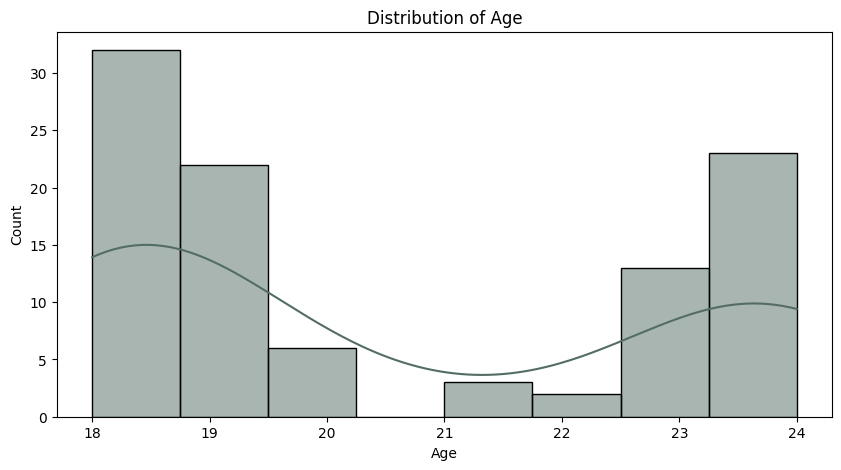

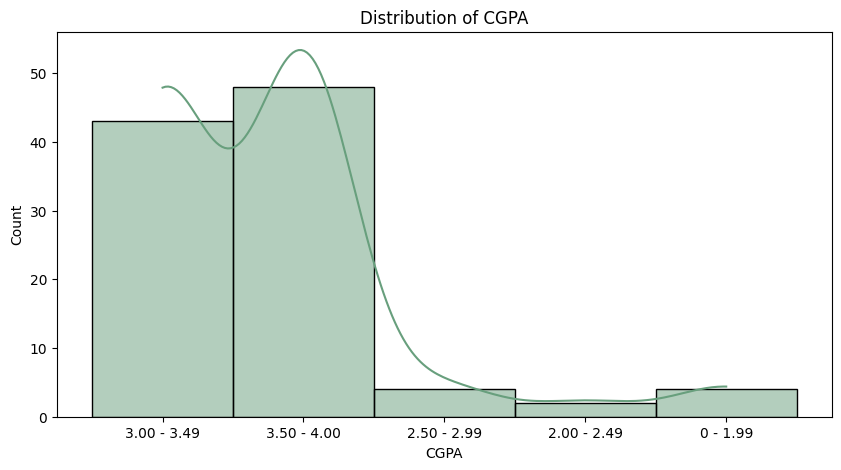

In [42]:
numerical_variables = ['Age', 'CGPA']
colors = ['#546D64', '#689F7D']

for column, color in zip(numerical_variables, colors):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=cdata, x = column, kde=True, color = color)
    plt.title(f'Distribution of {column}')
    plt.show()
    
    

Majority of the students fall in the age range 18-19 and 23-24.This distribution account for the fact that most of the students are in the first year. 
Most of the students have excellent performance, reasons why the majority of students fall in the CGPA ranges of 3.0 - 3.49 and 3.5 - 4.00.

In [43]:
cdata['Depression'].value_counts()

Depression
Not depressed    66
Depressed        35
Name: count, dtype: int64

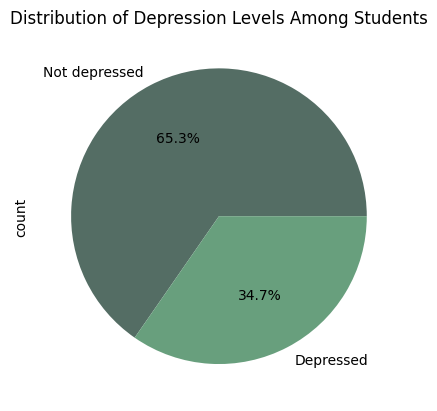

In [44]:
cdata['Depression'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#546D64','#689F7D'])
plt.title('Distribution of Depression Levels Among Students')
plt.show()

From the total number of students in the data 34.7% account for students that are depressed, although the rate is below 50%  this is rate is a  call for concern given that mental deals with the overall wellbeing of the students. 

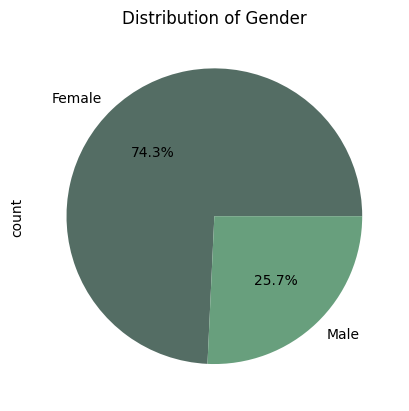

In [45]:
cdata['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#546D64','#689F7D'])
plt.title('Distribution of Gender')
plt.show()

74.3% of the student population is made up of female which shows that there are more female in the data compare to 25.7% of male.

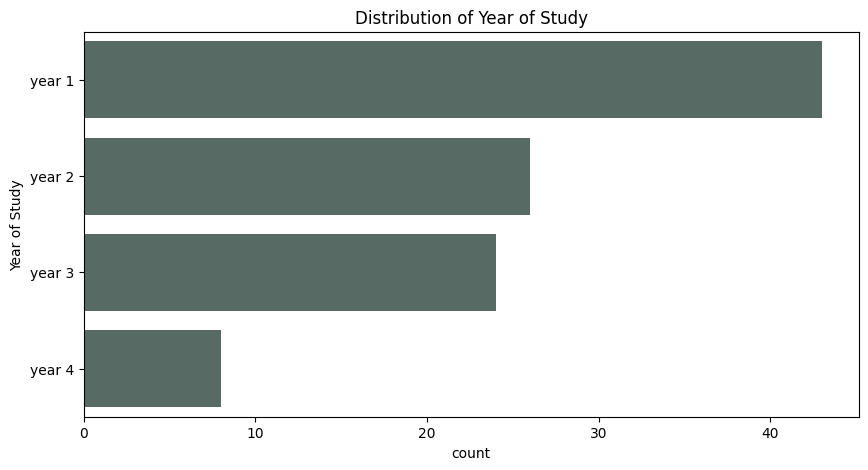

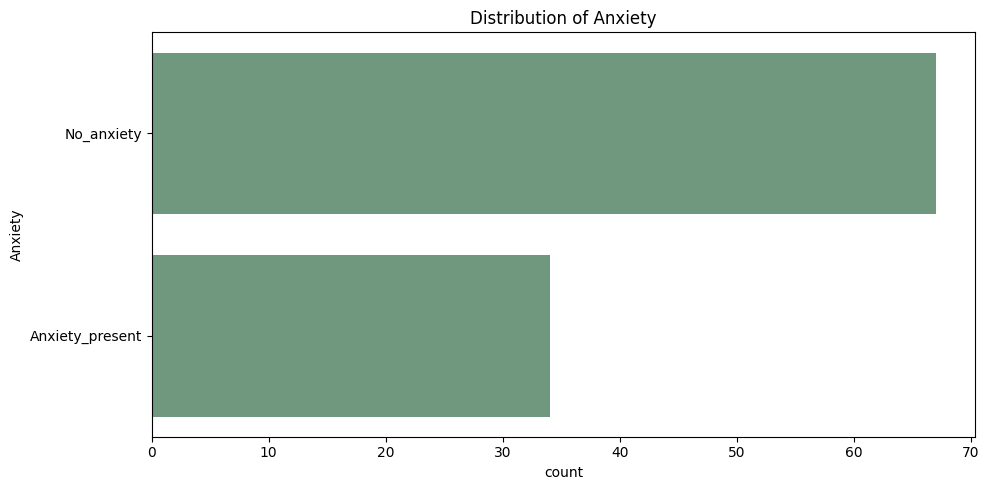

In [46]:
categorical_variables = [ 'Year of Study', 'Anxiety']
colors = ['#546D64', '#689F7D']

for column, color in zip(categorical_variables, colors):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=cdata, y=column, color=color)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


Majority of the students are in the first year. this could be one of the reasons why the dominant age group is 18 and 19. For the count of students with anxiety a considerable count(30 and above) for students expiriencing anxiety and 60% and above are not experiencing anxiety. 

In [47]:
len(cdata['Course'].unique())

36

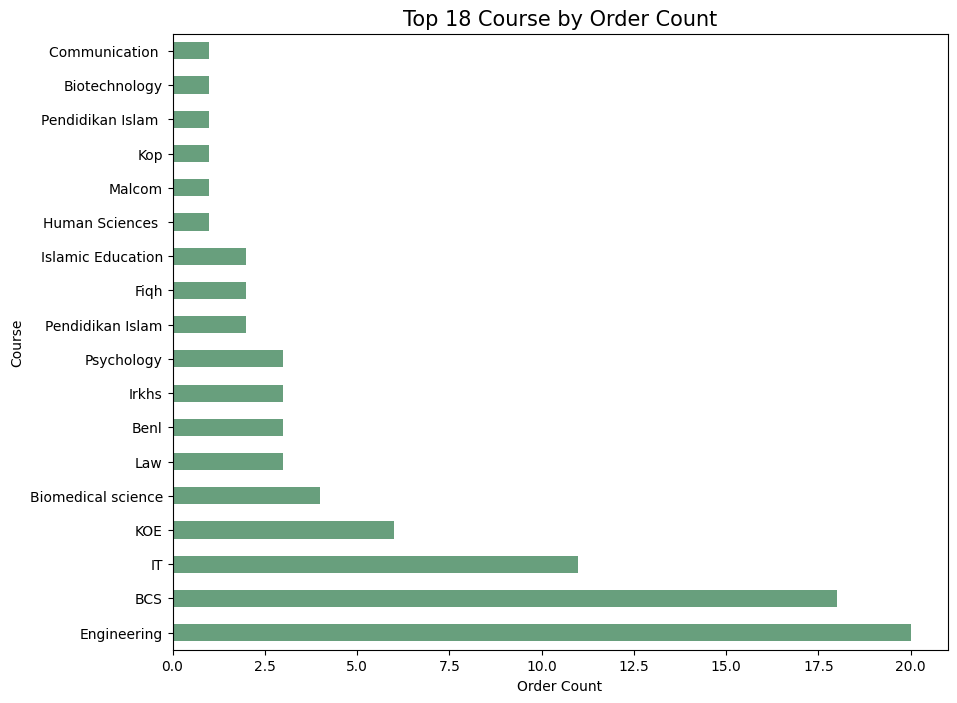

In [48]:
plt.figure(figsize=(10, 8))
cdata.Course.value_counts().iloc[:18].plot(kind='barh',color= '#689F7D' )
plt.title('Top 18 Course by Order Count', fontsize=15)
plt.xlabel('Order Count')
plt.ylabel('Course')
plt.show()

The majority of the students are enrolled engineering and BCS relative to other courses has less number of students.

In [49]:
cdata['Depression'].unique()

array(['Depressed', 'Not depressed'], dtype=object)

In [50]:
depression_df = cdata[cdata.Depression == 'Depressed']
depression_df

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,Not_married,Depressed,No_anxiety,Panic attack,No_treatment
2,8/7/2020 12:05,Male,19,IT,year 1,3.00 - 3.49,Not_married,Depressed,Anxiety_present,Panic attack,No_treatment
3,8/7/2020 12:06,Female,22,Law,year 3,3.00 - 3.49,Married,Depressed,No_anxiety,No panic_attack,No_treatment
6,8/7/2020 12:32,Female,23,Pendidikan Islam,year 2,3.50 - 4.00,Married,Depressed,No_anxiety,Panic attack,No_treatment
11,8/7/2020 12:39,Female,24,Engineering,year 3,3.50 - 4.00,Married,Depressed,No_anxiety,No panic_attack,No_treatment
12,8/7/2020 12:40,Female,18,BCS,year 1,3.00 - 3.49,Not_married,Depressed,No_anxiety,No panic_attack,No_treatment
17,8/7/2020 12:52,Female,24,ENM,year 4,3.00 - 3.49,Married,Depressed,Anxiety_present,Panic attack,No_treatment
19,8/7/2020 13:07,Female,18,Marine science,year 2,3.50 - 4.00,Married,Depressed,Anxiety_present,Panic attack,No_treatment
24,8/7/2020 13:17,Female,23,BCS,year 3,3.50 - 4.00,Not_married,Depressed,Anxiety_present,Panic attack,No_treatment
27,8/7/2020 13:41,Male,18,Engineering,year 2,3.00 - 3.49,Married,Depressed,Anxiety_present,No panic_attack,No_treatment


In [51]:
depression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 98
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       35 non-null     object
 1   Gender          35 non-null     object
 2   Age             35 non-null     int64 
 3   Course          35 non-null     object
 4   Year of Study   35 non-null     object
 5   CGPA            35 non-null     object
 6   Marital status  35 non-null     object
 7   Depression      35 non-null     object
 8   Anxiety         35 non-null     object
 9   Panic attack    35 non-null     object
 10  Treatment       35 non-null     object
dtypes: int64(1), object(10)
memory usage: 3.3+ KB


Numbers of depressed student across gender

In [52]:
depression_df.Gender.value_counts(normalize=True)

Gender
Female    0.828571
Male      0.171429
Name: proportion, dtype: float64

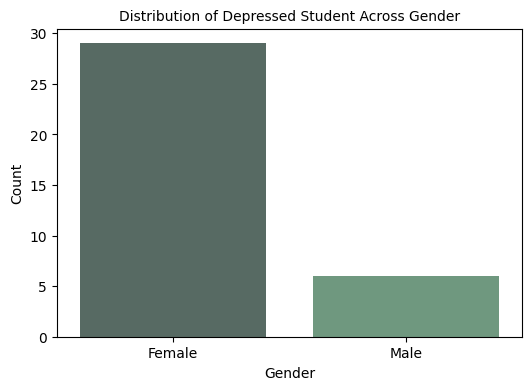

In [53]:
colors = ['#546D64', '#689F7D']

plt.figure(figsize=(6, 4))
sns.countplot(data=depression_df, x='Gender', palette=colors)
plt.title('Distribution of Depressed Student Across Gender', fontsize=10)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The distribution of Depressed Student Across Gender shows that more female student are depressed relative to the male students. 

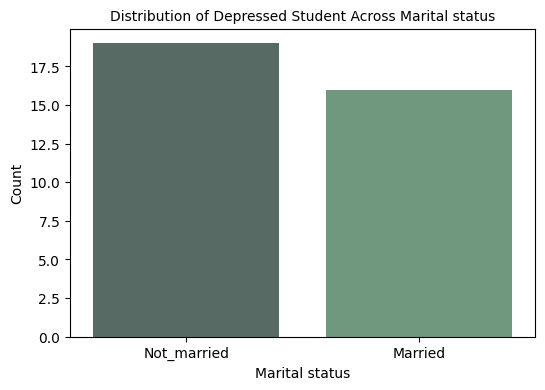

In [54]:
colors = ['#546D64', '#689F7D']

plt.figure(figsize=(6, 4))
sns.countplot(data=depression_df, x='Marital status', palette=colors)
plt.title('Distribution of Depressed Student Across Marital status', fontsize=10)
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.show()

For the distribution of students across married and unmarried. we see that the number of unmarried students that are depressed are more. this might be because the married students have support from their spouse which makes it easier for them to navigate life thus low number of married people being deoressed or due to the fact that a married student most have built a stronger attitude due to the expiriences gathered in matrimony which makes them more mentally stable than the unmarried.

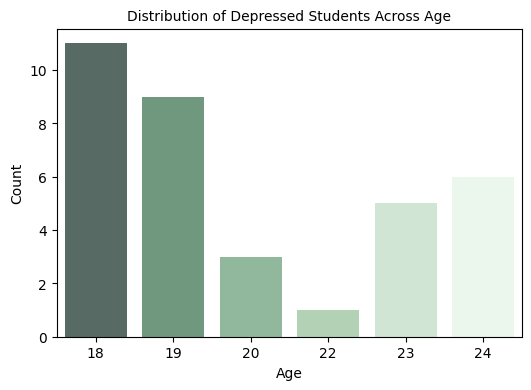

In [55]:
colors = ['#546D64', '#689F7D', '#8ABF99', '#AED6B1', '#CDE8D0', '#E9F8EB']

plt.figure(figsize=(6, 4))
sns.countplot(data=depression_df, x='Age', palette=colors)
plt.title('Distribution of Depressed Students Across Age', fontsize=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Across student age the proportion of students who are depressed falls with age 18 and 19. At 20 to 22 the proportion of depressed students decrease. There is also a noticeable increase in the number of depressed studnt form Age 24. 

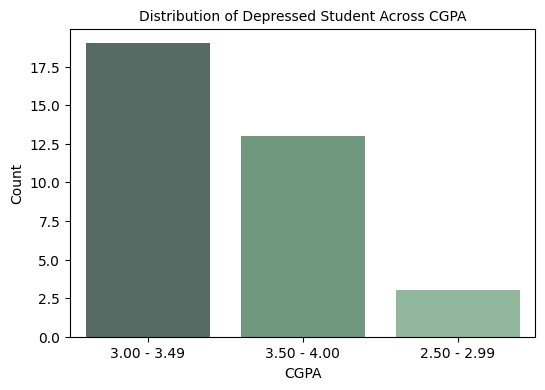

In [56]:
colors = ['#546D64', '#689F7D', '#8ABF99']
plt.figure(figsize=(6, 4))
sns.countplot(data=depression_df, x='CGPA', palette=colors)
plt.title('Distribution of Depressed Student Across CGPA', fontsize=10)
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

There are more depressed students with CGPA OF 3.00 - 3.49, followed by students with CGPA of 3.50 - 4.00. Only a few proportion of student with CGPA OF 2.50 - 2.99 are depressed.

In [57]:
depression_df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

<Figure size 800x500 with 0 Axes>

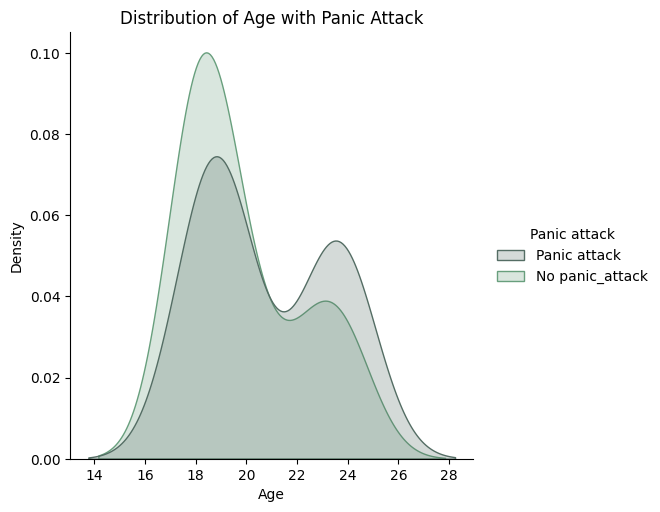

In [58]:
colors = {'Panic attack': '#546D64', 'No panic_attack': '#689F7D'}

plt.figure(figsize=(8, 5))
sns.displot(data=depression_df, x='Age', hue='Panic attack', palette=colors, kind='kde', fill=True)
plt.title('Distribution of Age with Panic Attack', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

The kernel density plot indicate that there are variations in the distribution of ages between students  with panick and no panick attack. Also, students  within the age of 18 and above without panick attack are more likely to be depressed relative to student with panick attack.

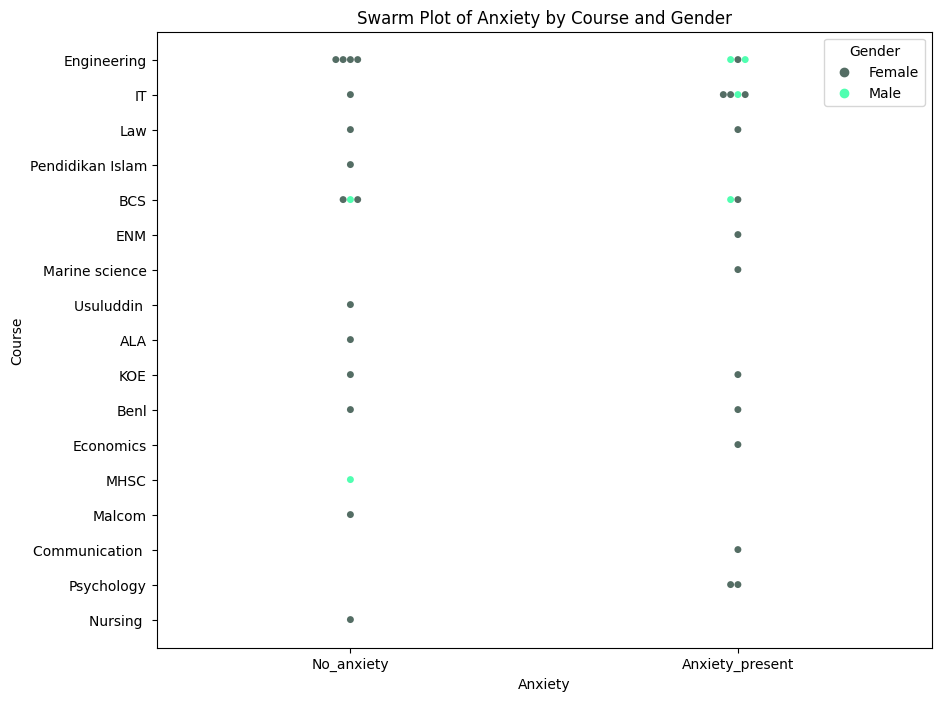

In [59]:
plt.figure(figsize=(10, 8))
sns.swarmplot(data=depression_df, x='Anxiety', y='Course', hue='Gender', palette=['#546D64', '#50FFB1'])
plt.title('Swarm Plot of Anxiety by Course and Gender')
plt.xlabel('Anxiety')
plt.ylabel('Course')
plt.show()

 More female students enrolled in engineering with no anxiety have depression compare to male student enrolled in engineering. while female student enrolled in IT with anxiety are more likely to have depression relative to male enrolled in IT. Overall there are variation in depression status across course of study and anxiety level.

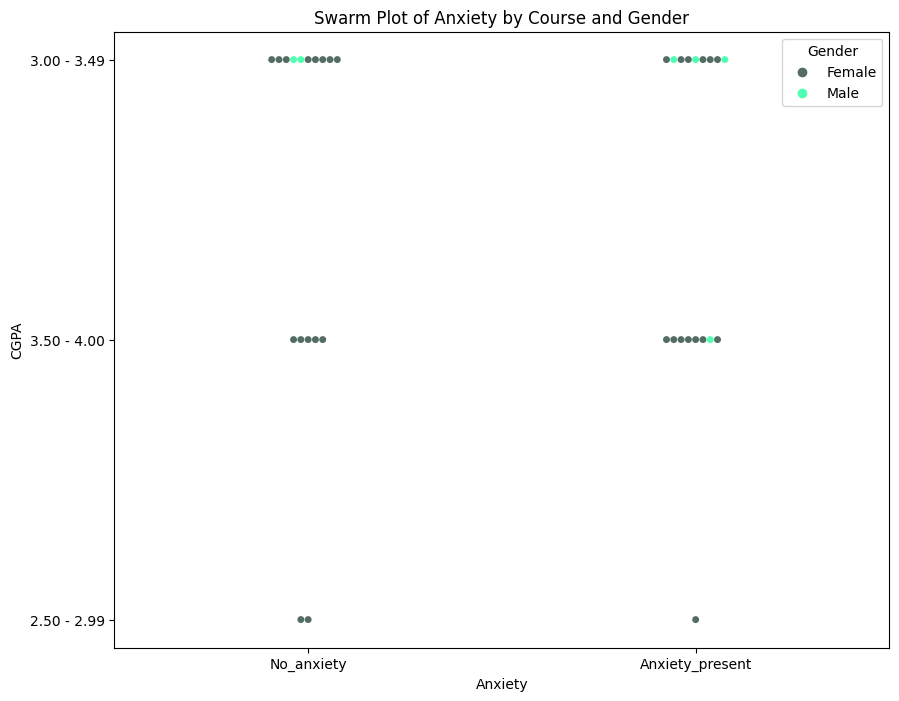

In [60]:
plt.figure(figsize=(10, 8))
sns.swarmplot(data=depression_df, x='Anxiety', y='CGPA', hue='Gender', palette=['#546D64', '#50FFB1'])
plt.title('Swarm Plot of Anxiety by Course and Gender')
plt.xlabel('Anxiety')
plt.ylabel('CGPA')
plt.show()

More female students  with CGPA of 3.00 to 3.49 with no anxiety have depression compare to female student with depression. while female student with anxiety and CGPA of 3.50 to 4.00 are more likely to have depression relative female students without depression and same CGPA . Overall there are variations in depression Among female student according to their CGPA. Female students with high CGPA tends to be anxious and this can lead to depression. further analysis is needed to prove the relationship between this variables. 

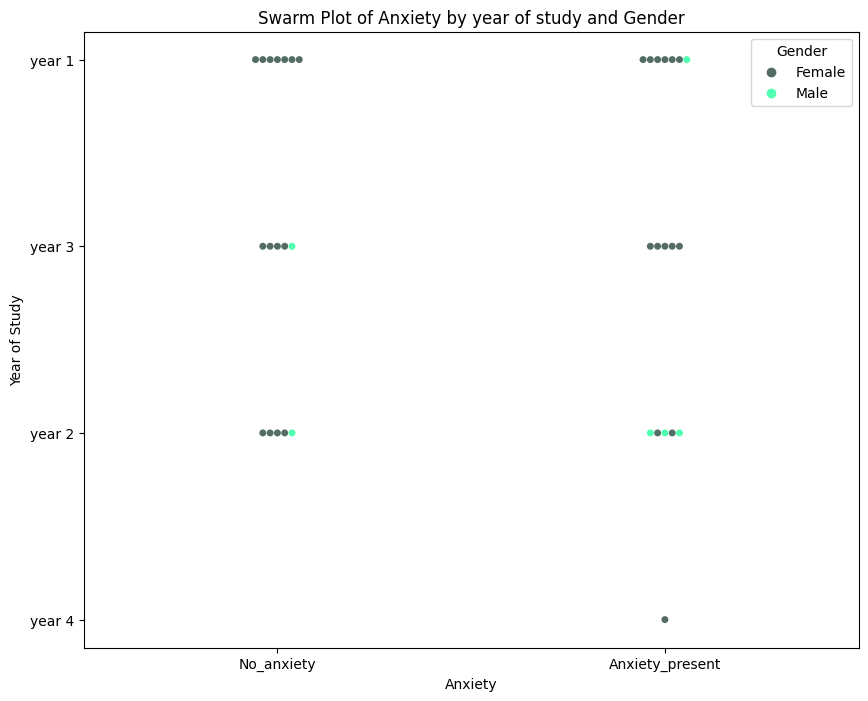

In [61]:
plt.figure(figsize=(10, 8))
sns.swarmplot(data=depression_df, x='Anxiety', y='Year of Study', hue='Gender', palette=['#546D64', '#50FFB1'])
plt.title('Swarm Plot of Anxiety by year of study and Gender')
plt.xlabel('Anxiety')
plt.ylabel('Year of Study')
plt.show()

More female students in year with no anxiety have depression compare to female students with anxiety in same level. For year 2, more female student with no anxiety have depression. In year 3, more female students with anxiety have depression. Overall there are variations in depression accross gender, Anxiety and year of students.